In [1]:
# import common APIs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve

# Data observation

In [2]:
filepath = '/Users/mac/Desktop/Kaggle_datasets/Video_Game_Sale/'
filename01 = 'Video_Games_Sales_22122016.csv'

df_full = pd.read_csv(os.path.join(filepath, filename01))
df_full.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_full.info() #注意，User_Score居然是object type，要轉換成numeric type才能操作

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [3]:
df = df_full.dropna()
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [24]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [13]:
df.Genre.value_counts()

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64

In [83]:
df['User_Score'] = pd.to_numeric(df['User_Score'])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


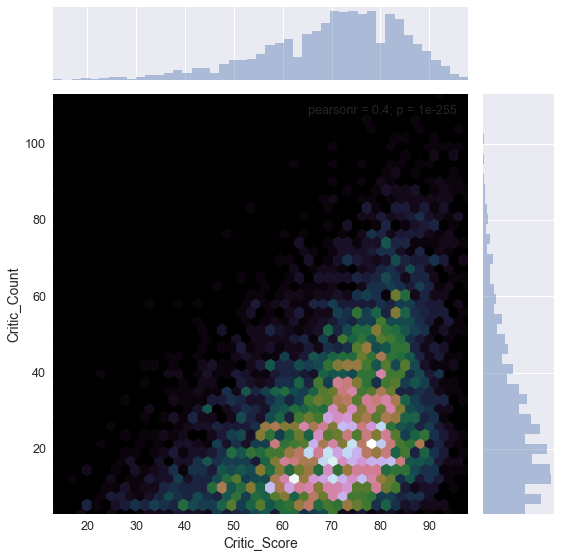

In [74]:
sns.jointplot('Critic_Score','Critic_Count',data=df,kind='hex', cmap='cubehelix', size=8)
plt.show()

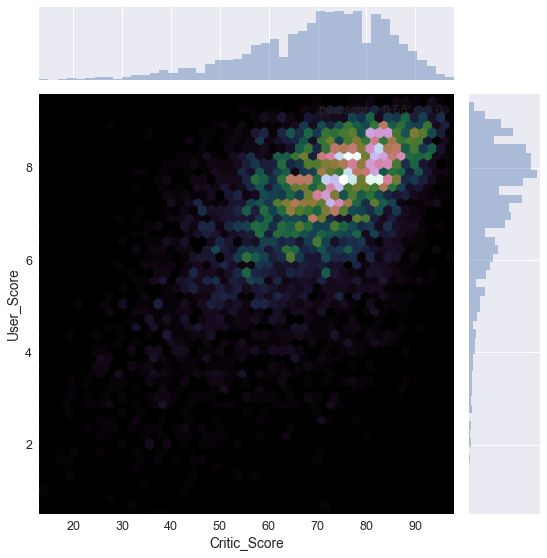

In [82]:
sns.jointplot('Critic_Score','User_Score',data=df,kind='hex', cmap='cubehelix', size=8)
plt.show()

## corr heatmap

In [84]:
columns_dum = ['Platform','Genre', 'Publisher','Developer', 'Rating']
df_dum = pd.get_dummies(df, columns=columns_dum)
df_dum.head()

,Name,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,...,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,Wii Sports,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,...,0,0,0,0,1,0,0,0,0,0
2,Mario Kart Wii,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,...,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,...,0,0,0,0,1,0,0,0,0,0
6,New Super Mario Bros.,2006.0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,...,0,0,0,0,1,0,0,0,0,0
7,Wii Play,2006.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,...,0,0,0,0,1,0,0,0,0,0


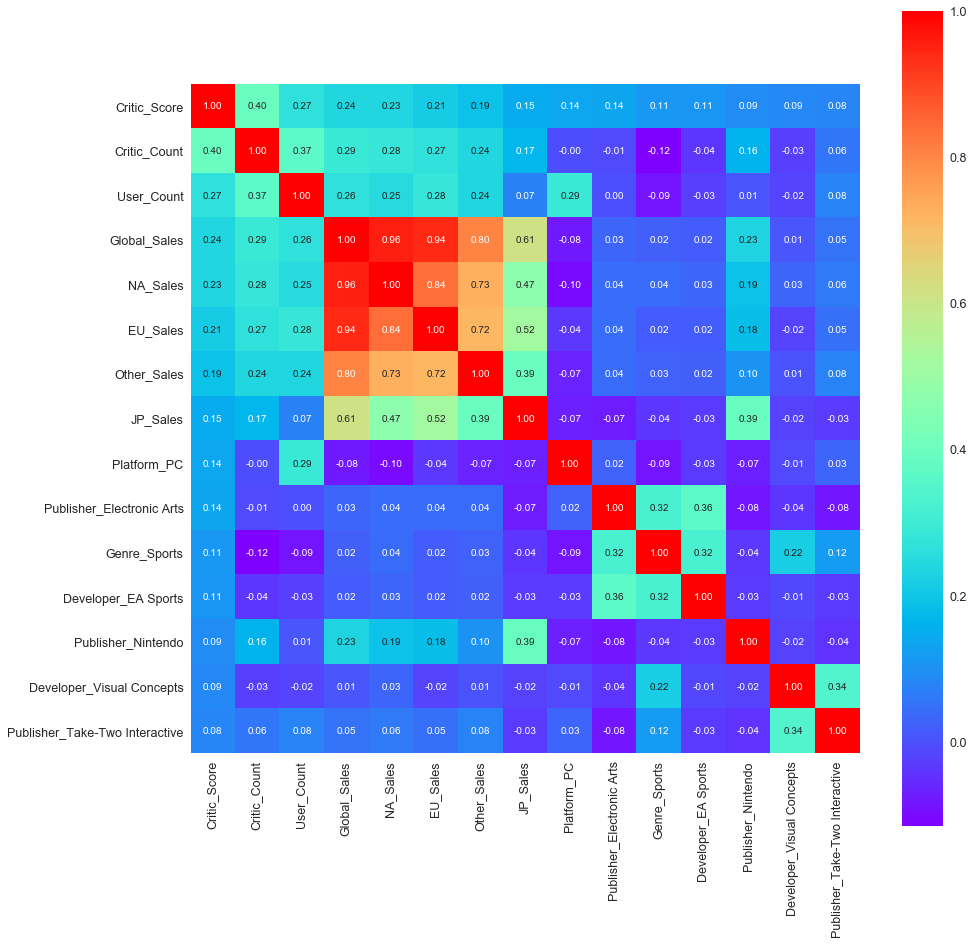

In [30]:
k = 15 #number of variables for heatmap
corrmat = df_dum.corr()
cols = corrmat.nlargest(k, 'Critic_Score')['Critic_Score'].index
cm = np.corrcoef(df_dum[cols].values.T)

plt.figure(figsize=(15,15)) #可以調整大小
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values, cmap='rainbow')
plt.show()

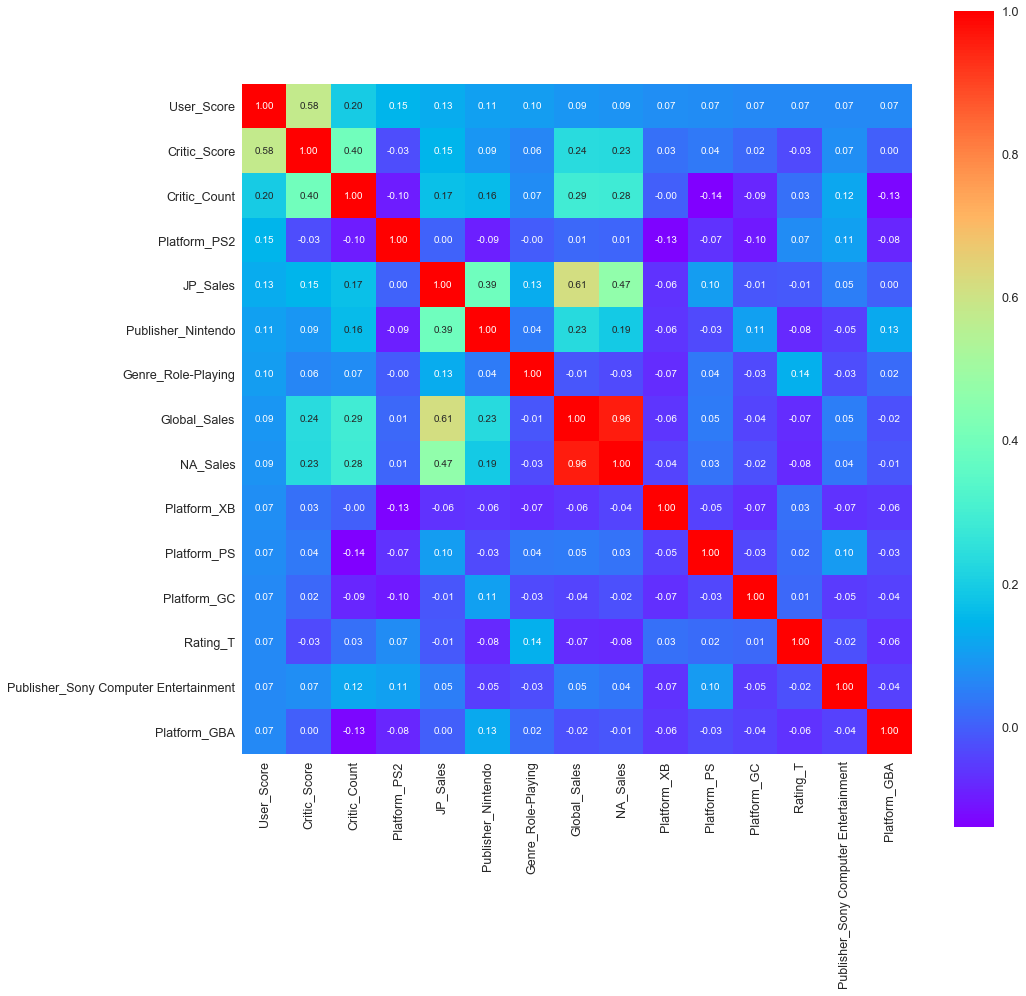

In [85]:
k = 15 #number of variables for heatmap
corrmat = df_dum.corr()
cols = corrmat.nlargest(k, 'User_Score')['User_Score'].index
cm = np.corrcoef(df_dum[cols].values.T)

plt.figure(figsize=(15,15)) #可以調整大小
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values, cmap='rainbow')
plt.show()

# 7th generation game console: Wii, PS3, X360

In [86]:
# Dataframe contain info only on the 7th Gen consoles
video7th = df[(df['Platform'] == 'Wii') | (df['Platform'] == 'PS3') | (df['Platform'] == 'X360')]
video7th.shape

(2106, 16)

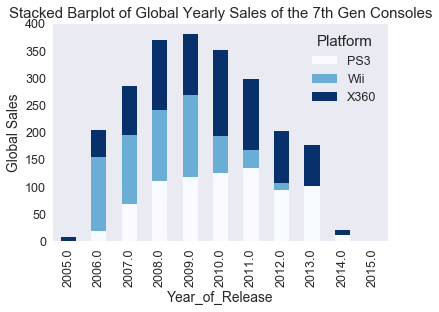

In [106]:
yearlySales = video7th.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'Blues',  grid=False)
plt.title('Stacked Barplot of Global Yearly Sales of the 7th Gen Consoles')
plt.ylabel('Global Sales')
plt.show()

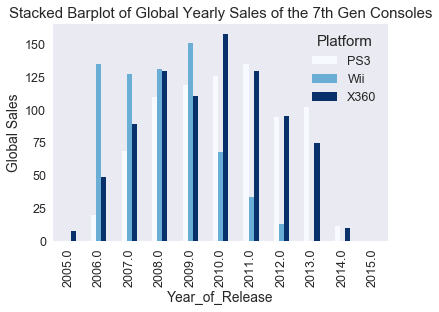

In [107]:
yearlySales = video7th.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=False, colormap= 'Blues',  grid=False)
plt.title('Stacked Barplot of Global Yearly Sales of the 7th Gen Consoles')
plt.ylabel('Global Sales')
plt.show()

In [90]:
yearlySales.head() #由變項1和變項2做groupby，並且做變項3的計算函數

Year_of_Release  Platform
2005.0           X360          7.66
2006.0           PS3          19.61
                 Wii         134.97
                 X360         48.92
2007.0           PS3          68.49
Name: Global_Sales, dtype: float64

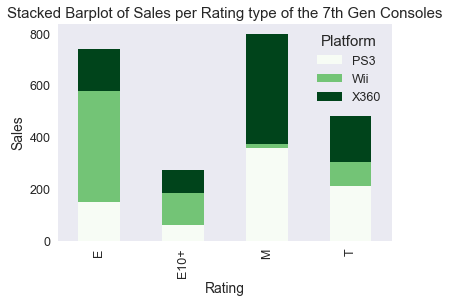

In [108]:
ratingSales = video7th.groupby(['Rating','Platform']).Global_Sales.sum()
ratingSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Greens', grid=False)
plt.title('Stacked Barplot of Sales per Rating type of the 7th Gen Consoles')
plt.ylabel('Sales')
plt.show()

In [97]:
ratingSales

Rating  Platform
E       PS3         150.94
        Wii         428.22
        X360        161.54
E10+    PS3          61.67
        Wii         125.28
        X360         86.48
M       PS3         360.15
        Wii          13.52
        X360        424.49
T       PS3         211.54
        Wii          91.96
        X360        180.79
Name: Global_Sales, dtype: float64

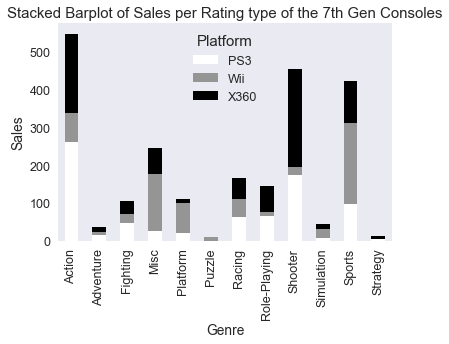

In [113]:
GenreSales = video7th.groupby(['Genre','Platform']).Global_Sales.sum()
GenreSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Greys', grid=False)
plt.title('Stacked Barplot of Sales per Rating type of the 7th Gen Consoles')
plt.ylabel('Sales')
plt.show()

In [100]:
GenreSales

Genre         Platform
Action        PS3         262.38
              Wii          75.75
              X360        209.90
Adventure     PS3          16.18
              Wii           7.72
              X360         11.52
Fighting      PS3          47.83
              Wii          21.89
              X360         35.30
Misc          PS3          26.59
              Wii         149.42
              X360         70.09
Platform      PS3          20.91
              Wii          78.25
              X360         10.26
Puzzle        PS3           0.40
              Wii           8.22
              X360          0.36
Racing        PS3          62.17
              Wii          48.35
              X360         56.14
Role-Playing  PS3          64.00
              Wii          11.01
              X360         68.62
Shooter       PS3         174.54
              Wii          19.20
              X360        260.35
Simulation    PS3           7.91
              Wii          23.88
              X360  

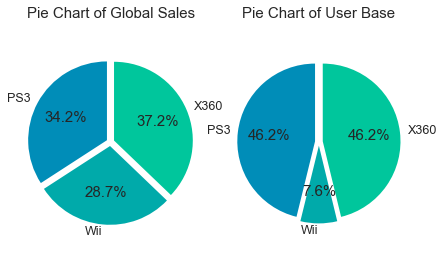

In [114]:
colors = ['#008DB8','#00AAAA','#00C69C']

plt.subplot(121)
plt.pie( video7th.groupby('Platform').Global_Sales.sum(),
    # with the labels being platform
    labels=video7th.groupby('Platform').Global_Sales.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of Global Sales')

plt.subplot(122)
plt.pie( video7th.groupby('Platform').User_Count.sum(),
    labels=video7th.groupby('Platform').User_Count.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of User Base')
plt.tight_layout()
plt.show()

# 8th generation console: PS4 vs XBOXONE vs WiiU

In [116]:
video8th = df[(df['Platform'] == 'WiiU') | (df['Platform'] == 'PS4') | (df['Platform'] == 'XOne')]
video8th.shape

(487, 16)

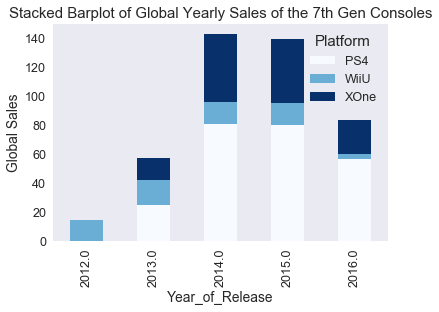

In [117]:
yearlySales = video8th.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'Blues',  grid=False)
plt.title('Stacked Barplot of Global Yearly Sales of the 7th Gen Consoles')
plt.ylabel('Global Sales')
plt.show()

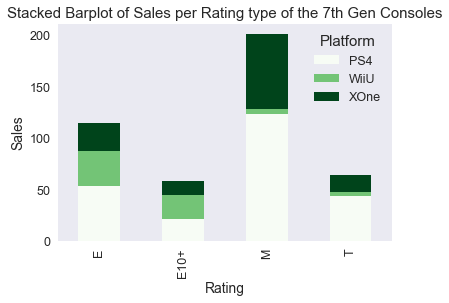

In [118]:
ratingSales = video8th.groupby(['Rating','Platform']).Global_Sales.sum()
ratingSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Greens', grid=False)
plt.title('Stacked Barplot of Sales per Rating type of the 7th Gen Consoles')
plt.ylabel('Sales')
plt.show()

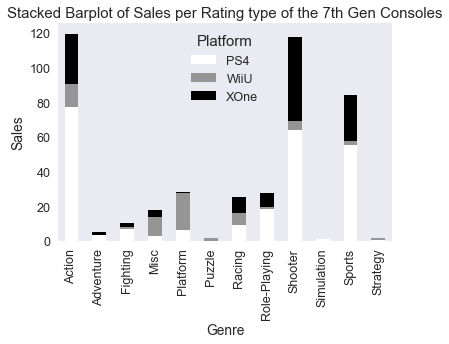

In [119]:
GenreSales = video8th.groupby(['Genre','Platform']).Global_Sales.sum()
GenreSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Greys', grid=False)
plt.title('Stacked Barplot of Sales per Rating type of the 7th Gen Consoles')
plt.ylabel('Sales')
plt.show()

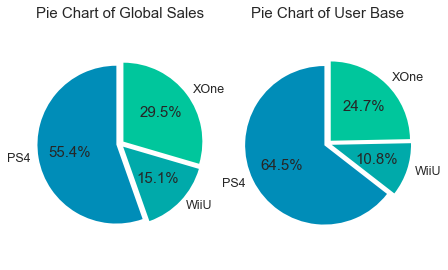

In [120]:
colors = ['#008DB8','#00AAAA','#00C69C']

plt.subplot(121)
plt.pie( video8th.groupby('Platform').Global_Sales.sum(),
    # with the labels being platform
    labels=video8th.groupby('Platform').Global_Sales.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of Global Sales')

plt.subplot(122)
plt.pie( video8th.groupby('Platform').User_Count.sum(),
    labels=video8th.groupby('Platform').User_Count.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of User Base')
plt.tight_layout()
plt.show()

# 目標1: regression, 預測 User_Score

In [40]:
from sklearn.utils import shuffle

shuffle_df = shuffle(df_dum, random_state=42)

df_label = shuffle_df['User_Score']
df_feature = shuffle_df.drop('User_Score', axis=1)

cut_point = round(len(df_dum)*0.6)
train_feature = np.array(df_feature.values[:cut_point,1:])
train_label = np.array(df_label.values[:cut_point]).astype(float)
test_feature = np.array(df_feature.values[cut_point:,1:])
test_label = np.array(df_label.values[cut_point:]).astype(float)

## Scikit-learn

### svm.LinearSVR()

In [41]:
from sklearn import datasets,cross_validation,svm

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0)
regr=svm.LinearSVR()
regr.fit(X_train,y_train)
print('Coefficients:%s, intercept %s'%(regr.coef_,regr.intercept_))
print('Score: %.2f' % regr.score(X_test, y_test))

np.mean(np.abs((regr.predict(test_feature)-test_label)/test_label)) #平均誤差百分比

Coefficients:[  8.06831689e-04  -3.06203718e-03  -7.77597267e-03 ...,   6.23566231e-03
   2.31132192e-05   2.95322851e-02], intercept [ 0.00046795]
Score: -0.08


0.18582127209450455

### DecisionTreeRegressor()

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets,cross_validation

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0)
regr=DecisionTreeRegressor()
regr.fit(X_train,y_train)
print("Traing Score:%f"%regr.score(X_train,y_train))
print("Testing Score:%f"%regr.score(X_test,y_test))

np.mean(np.abs((regr.predict(test_feature)-test_label)/test_label)) #平均誤差百分比

Traing Score:1.000000
Testing Score:0.141318


0.17416528766137604

### ensemble.RandomForestRegressor()

In [43]:
from sklearn import datasets,cross_validation,ensemble

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0)
regr=ensemble.RandomForestRegressor()
regr.fit(X_train,y_train)
print("Traing Score:%f"%regr.score(X_train,y_train))
print("Testing Score:%f"%regr.score(X_test,y_test))

np.mean(np.abs((regr.predict(test_feature)-test_label)/test_label)) #平均誤差百分比

Traing Score:0.901627
Testing Score:0.467207


0.13930806598269804

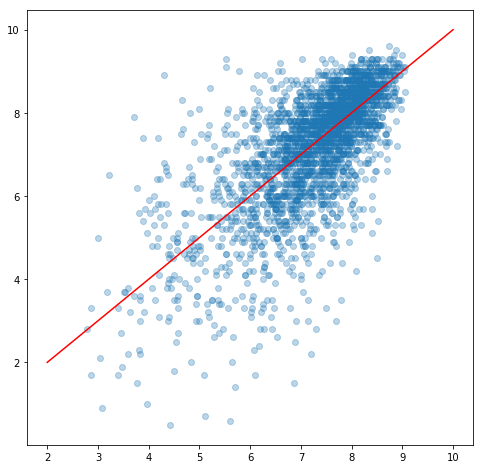

In [65]:
plt.figure(figsize=(8,8))
plt.scatter(regr.predict(test_feature), test_label, alpha=0.3)

x=np.linspace(2, 10, 40)
y=x
plt.plot(x,y,c='red') #創造100%正確的線
plt.show()

## Keras: MLP (Regression前要MinMaxScaler一下)，結果頗差...

In [21]:
# Standardize
scaler = MinMaxScaler()
scaler.fit(train_feature)
train_feature_trans = scaler.transform(train_feature)
test_feature_trans = scaler.transform(test_feature)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 500)               798500    
_________________________________________________________________
dropout_10 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 200)               100200    
_________________________________________________________________
dropout_11 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 201       
Total para

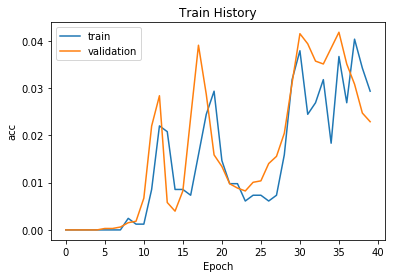

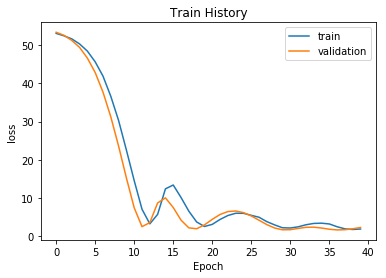

2720/2730 [============================>.] - ETA: 0s

accuracy= 0.0219780219835


In [18]:
# Keras MLP models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

model = Sequential() 
model.add(Dense(units=500, 
                input_dim=1596, 
                kernel_initializer='uniform', 
                ))
model.add(Dropout(0.5))

model.add(Dense(units=200,  
                kernel_initializer='uniform', 
                ))
model.add(Dropout(0.5))

model.add(Dense(units=200,  
                kernel_initializer='uniform', 
                ))
model.add(Dropout(0.5))

model.add(Dense(units=1, #輸出一個數字 
                kernel_initializer='uniform',
                ))

print(model.summary()) #可以清楚看到model還有參數數量

model.compile(loss='mean_squared_error',
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=train_feature_trans, y=train_label,  #上面多分割一步在keras是內建的
                          validation_split=0.8, epochs=40, 
                          batch_size=2000, verbose=1) #verbose=2表示顯示訓練過程

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

scores = model.evaluate(test_feature_trans, test_label)
print('\n')
print('accuracy=',scores[1])

prediction = model.predict(test_feature_trans)

In [39]:
np.mean(np.abs(  (prediction-test_label)/test_label  )) #平均誤差百分比

55.873868139614117

# 目標2: regression, 預測 Global_Sales
(但是要剔除各地區的Sale才會比較準確)

In [23]:
cols = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales',]

df_sales_pred = df_dum.drop(cols , axis=1)
df_sales_pred.head()

,Name,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_3DS,Platform_DC,Platform_DS,...,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,Wii Sports,2006.0,82.53,76.0,51.0,8,322.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Mario Kart Wii,2008.0,35.52,82.0,73.0,8.3,709.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,2009.0,32.77,80.0,73.0,8,192.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,New Super Mario Bros.,2006.0,29.80,89.0,65.0,8.5,431.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
7,Wii Play,2006.0,28.92,58.0,41.0,6.6,129.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


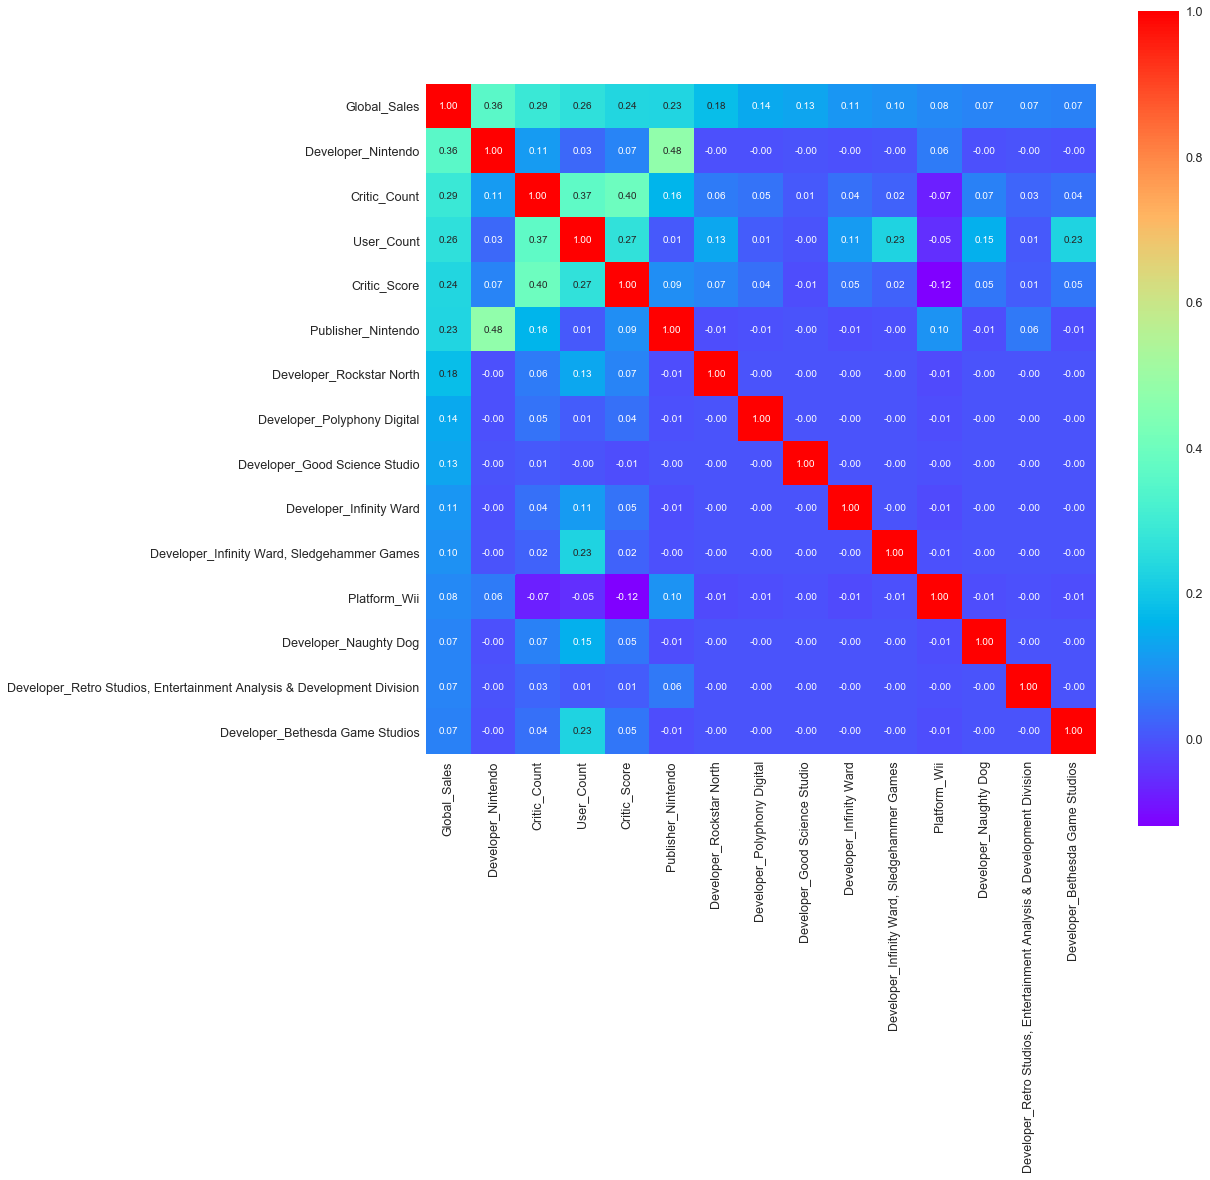

In [73]:
k = 15 #number of variables for heatmap
corrmat = df_sales_pred.corr()
cols = corrmat.nlargest(k, 'Global_Sales')['Global_Sales'].index
cm = np.corrcoef(df_sales_pred[cols].values.T)

plt.figure(figsize=(15,15)) #可以調整大小
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values, cmap='rainbow')

plt.show()

In [66]:
from sklearn.utils import shuffle

shuffle_df = shuffle(df_sales_pred, random_state=42)

df_label = shuffle_df['Global_Sales']
df_feature = shuffle_df.drop('Global_Sales', axis=1)

cut_point = round(len(df_dum)*0.6)
train_feature = np.array(df_feature.values[:cut_point,1:])
train_label = np.array(df_label.values[:cut_point]).astype(float)
test_feature = np.array(df_feature.values[cut_point:,1:])
test_label = np.array(df_label.values[cut_point:]).astype(float)

### svm.LinearSVR()

In [38]:
from sklearn import datasets,cross_validation,svm

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0)
regr=svm.LinearSVR()
regr.fit(X_train,y_train)
print('Coefficients:%s, intercept %s'%(regr.coef_,regr.intercept_))
print('Score: %.2f' % regr.score(X_test, y_test))
np.mean(np.abs((regr.predict(test_feature)-test_label)/test_label)) #平均誤差百分比

Coefficients:[ -2.13697658e-04   1.62207415e-02   1.27048397e-02 ...,  -3.62307604e-02
  -5.42543013e-05  -3.32232682e-02], intercept [ 0.00023232]
Score: 0.09


6.5198901970602599

### DecisionTreeRegressor()

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets,cross_validation

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0)
regr=DecisionTreeRegressor()
regr.fit(X_train,y_train)
print("Traing Score:%f"%regr.score(X_train,y_train))
print("Testing Score:%f"%regr.score(X_test,y_test))
np.mean(np.abs((regr.predict(test_feature)-test_label)/test_label)) #平均誤差百分比

Traing Score:1.000000
Testing Score:0.191965


1.5403973078151827

### ensemble.RandomForestRegressor()

In [67]:
from sklearn import datasets,cross_validation,ensemble

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0)
regr=ensemble.RandomForestRegressor()
regr.fit(X_train,y_train)
print("Traing Score:%f"%regr.score(X_train,y_train))
print("Testing Score:%f"%regr.score(X_test,y_test))
np.mean(np.abs( (regr.predict(test_feature)-test_label)/test_label)) #平均誤差百分比

Traing Score:0.890594
Testing Score:0.154715


1.5997260429778126

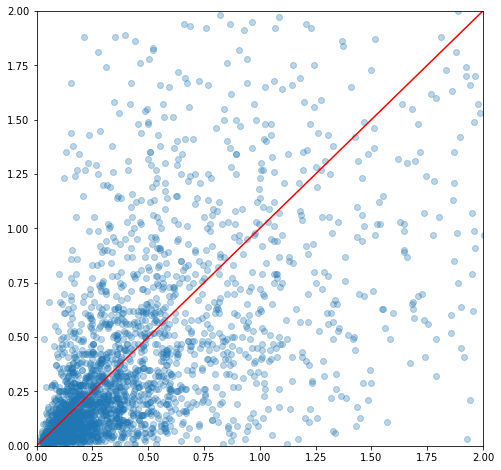

In [72]:
plt.figure(figsize=(8,8))
plt.scatter(regr.predict(test_feature), test_label, alpha=0.3)

x=np.linspace(0, 40, 100)
y=x
plt.plot(x,y,c='red') #創造100%正確的線
plt.xlim(0,2)
plt.ylim(0,2)
plt.show() #可以發現在銷售量0~2中間根本是錯誤百出，毫無章法XD